##### Guru Charan Bogireddy - 8902043

# LAB 2

#### Part A <br>
Use the Lab2 dataset provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
# Load the dataset 
lab2DF = pd.read_csv("Lab2_dataset.csv")
lab2DF.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [56]:
# Count the number of empty rows in each column
empty_rows = lab2DF.isnull().sum()
empty_rows

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [57]:
X_text = lab2DF["text"]
y = lab2DF["label_num"]

In [58]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(X_text)

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [61]:
# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

GaussianNB()

In [139]:
# Print vocabulary matrix
#print("Vocabulary: ",vectorizer.vocabulary_)

In [63]:
print(X_test.toarray())
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]]
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [64]:
# Predict the labels for the test data
y_pred = gnb.predict(X_test.toarray())

In [65]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9545893719806763


## Now lets use Multinomial NB

In [66]:
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Fit the classifier to the training data
mnb.fit(X_train.toarray(), y_train)

MultinomialNB()

In [67]:
# Predict the labels for the test data
mnb_Ypred = mnb.predict(X_test)

In [68]:
print(mnb_Ypred)

[0 1 0 ... 1 0 0]


In [69]:
# Calculate the accuracy of the classifier
mnbAccuracy = accuracy_score(y_test, mnb_Ypred)
print("Accuracy:", mnbAccuracy)

Accuracy: 0.978743961352657


We used both gaussian and multinomial classifier for the given data set and measured accuracy of both the data. Both accuracies are almost same, but multinomial score is little higher. <br>
Gaussian score : 0.9545893719806763 <br>
Multinomial score : 0.978743961352657

### Part B <br>
Use this air bnb new york city dataset and remove outliers based on price per night for a given apartment/home. You can demonstrate why using other techniques like mean/median/ percentile works. The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [70]:
# Load the dataset
airbnbNYDF = pd.read_csv("AB_NYC_2019.csv") 
airbnbNYDF.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [71]:
# Count the number of empty rows in each column
nullRows = airbnbNYDF.isna().count
duplicateRows = airbnbNYDF[airbnbNYDF.duplicated()]
print(nullRows)
print(duplicateRows)

<bound method DataFrame.count of           id   name  host_id  host_name  neighbourhood_group  neighbourhood   
0      False  False    False      False                False          False  \
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  l

In [72]:
import matplotlib.pyplot as plt

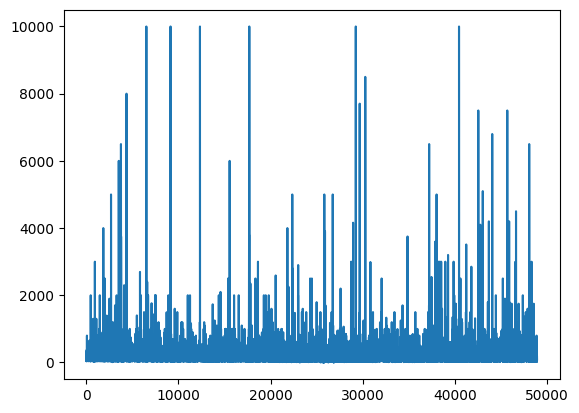

In [129]:
plt.plot(airbnbNYDF['price']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x223cf2cd1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x223cf2cd700>,
 'boxes': [<matplotlib.lines.Line2D at 0x223cf2beee0>],
 'medians': [<matplotlib.lines.Line2D at 0x223cf2cdc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x223cf2cdee0>],
 'means': []}

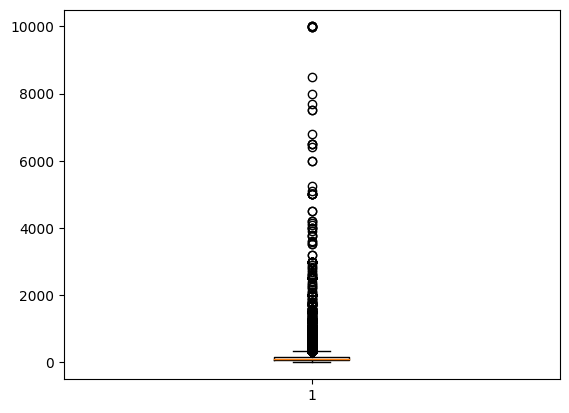

In [75]:
plt.boxplot(airbnbNYDF["price"])

In [140]:
airbnbNYDF["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

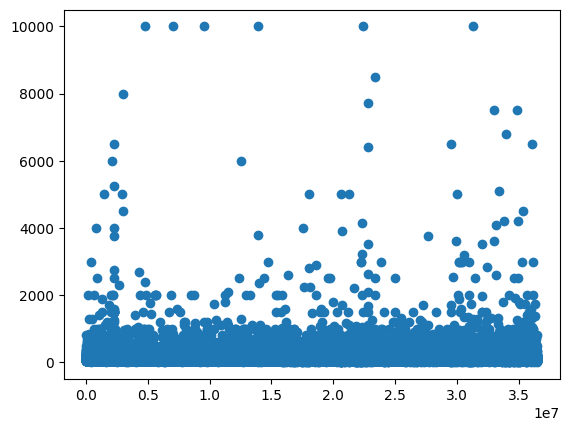

In [78]:
plt.scatter(x=airbnbNYDF['id'], y=airbnbNYDF['price'])

In [79]:
import numpy as np

### I am using IQR method to deal with outliers <br>
#### Fortunately, interquartile ranges are relatively robust against outlier influence.
#### This method also does not assume the data follow the normal distribution or any other distribution.

In [91]:

# Calculate the IQR
q1 = np.percentile(airbnbNYDF['price'], 25)
q3 = np.percentile(airbnbNYDF['price'], 75)
iqr = q3 - q1

175.0

In [81]:
# Define the lower and upper boundaries

lowerBound = max(min(airbnbNYDF['price']),(q1 - (1.5*iqr)))
upperBound = q3 + (1.5*iqr)
print(lowerBound)
print(upperBound)

0
334.0


In [125]:
# Identify outliers
outliers = airbnbNYDF[(airbnbNYDF['price'] < lowerBound) | (airbnbNYDF['price'] > upperBound)]

# Print the outliers
print("Outliers:", outliers[['id','price']])

# List of ids to delete
outlierIds = list(outliers['id'])

Outliers:              id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]


In [127]:
# Delete rows based on outliers list
filteredDf = airbnbNYDF[~airbnbNYDF['id'].isin(outlierIds)]
len(filteredDf)

45923

In [132]:
#filtered dataset's mean, median and other data
price_mean = filteredDf['price'].mean()
price_median = filteredDf['price'].median()
print(price_mean)
print(price_median)
print(min(filteredDf["price"]))
print(max(filteredDf["price"]))

119.97031988328288
100.0
0
334


In [134]:
#filtered dataset's info
filteredDf['price'].describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

|     |  Dataset with outliers | After removing Outliers |
| --- |  ---------------  |  ------------------ |
|count|    48895.000000   |   45923.000000      |
|mean |     152.720687    |   119.97031988328288|
|std  |      240.154170   |   68.150148<br>     |
|min  |        0.000000   |   0                 |
|25%  |       69.000000   |   65.000000         |
|50%  |      106.000000   |   100.000000        |
|75%  |      175.000000   |   159.000000        |
|max  |    10000.000000   |   334               |